In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/case/mercedes-benz-greener-manufacturing.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()

In [0]:
file_name='test.csv.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()  

In [0]:
import pandas as pd

In [0]:
test_data=pd.read_csv('test.csv')

#### In this screenshot i have label my file with different different color 

1. blue is Joblib file(for xgboost and label encoding)
2. orange is csv file(for cluster and removing zero column)
3. yellow is csv file (contain all column name)
4. green is csv file (contain key and value for making set's for test data (X0 andX2)

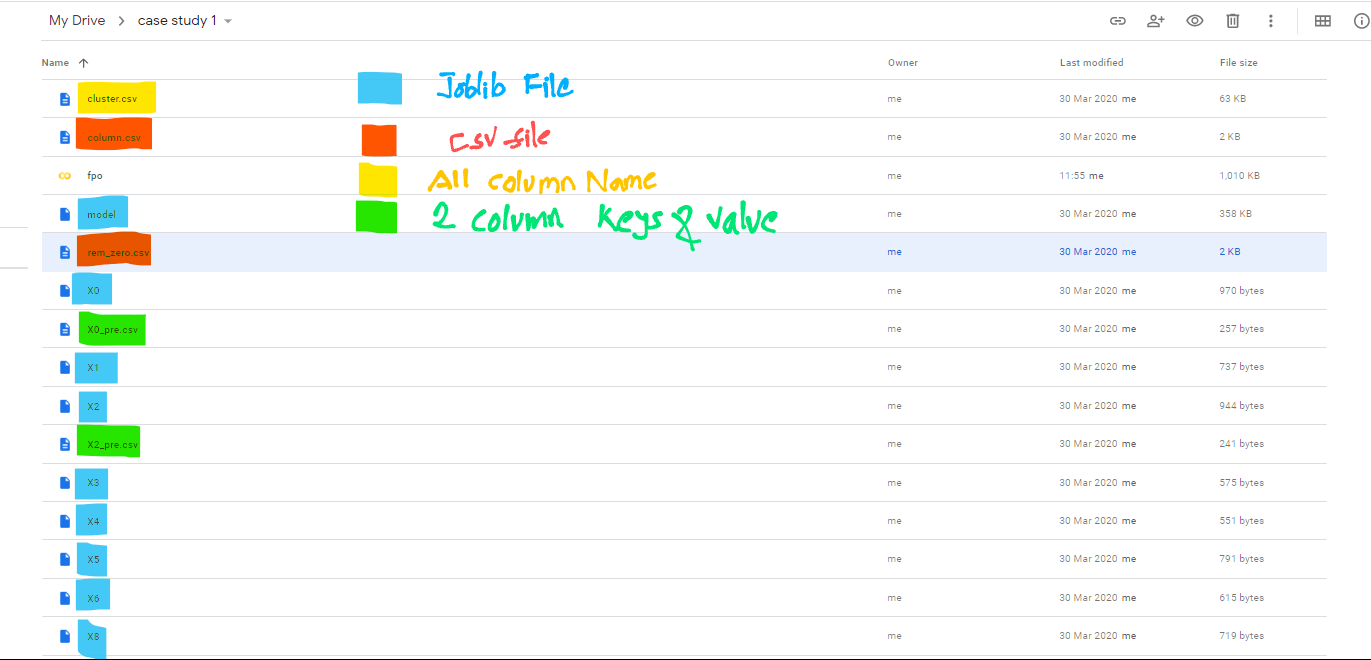

In [11]:
from IPython.display import Image
Image('/content/drive/My Drive/ann.png',width=800,height=470)

In [13]:
def final(test):
  import joblib
  import csv
  import numpy as np
  try:
    a='/content/drive/My Drive/case study 1/'
    #column name
    f= open(a+'column.csv','r',newline='')
    obj=csv.reader(f)
    d=list(obj)
    f.close()
    df_test=pd.DataFrame(test,columns=[i[0] for i in d])
    #empty dataframe
    data_test=pd.DataFrame()
    #X0_n,X2_n
    d0={}
    d2={}
    for j,i in enumerate(['rem_zero.csv','X0_pre.csv','X2_pre.csv']):
      f= open('/content/drive/My Drive/case study 1/'+i,'r',newline='')
      obj=csv.reader(f)
      if j==0:
        d=list(obj)
        n=[k[0] for k in d]
      if j==1:
        e=list(obj)
        for p in e:
          d0[p[0]]=int(p[1])
      if j==2:
        g=list(obj)
        for t in g:
          d2[t[0]]=int(t[1])
      f.close()
    uni=list(d0.keys())
    X_0=[]
    for i in df_test.X0:
      if i in uni:
        X_0.append(d0[i])
      else:
        X_0.append(0)
    data_test['X0_n']=X_0
      #
    uni=list(d2.keys())
    X_2=[]
    for i in df_test.X2:
      if i in uni:
        X_2.append(d2[i])
      else:
        X_2.append(0)
    data_test['X2_n']=X_2
    for i in ['X0','X1','X2','X3','X4','X5','X6','X8']:
      pre_te_enc=joblib.load(a+i)
      data_test[i]=pre_te_enc.transform(df_test[i])
    #remove zero
    bin_df=df_test.loc[:,n].astype(str).astype(int)
    #ID
    data_test['ID']=[(1/(np.log(i)+3)) for i in df_test.ID]
    data_te=pd.concat([data_test,bin_df],axis=1)
    #cluster
    dc=pd.read_csv(a+'cluster.csv')
    data_te['X0_clus']=df_test['X0'].map(dc.groupby('X')['label'].median())
    #adding 
    data_te['X118_plus_X314_plus_X315'] = df_test.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
    data_te['X314_plus_X315'] = df_test.apply(lambda row: row.X314 + row.X315, axis=1)
    #prediction
    xgb=joblib.load('/content/drive/My Drive/case study 1/model')
    pre=(xgb.predict(data_te)+.4)
    return pre
  except:
    print('data should be in 2D')
pred=final(test_data.values)

[14:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
pred

array([ 85.68865 , 102.376595,  85.50872 , ...,  93.08515 , 110.703636,
        92.89591 ], dtype=float32)